<h1 style="text-align: center">
Deep Learning HW4 </br>
VAE and CVAE
</h1>


### Full Name: Ali Pirhosseinlou
### Student ID: 402200372

# Import necessary libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random
import torchvision

# Define the MNIST dataset and data loader

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 113564431.50it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28053657.67it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32144958.55it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11024611.56it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Data Visualization

In [ ]:
# Function to display an image
def show_image(image, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Function to show random images from each class
def show_random_images_from_each_class(dataset, num_images_per_class=4, figsize=(10, 20)):
    class_labels = list(range(10))
    fig, axs = plt.subplots(len(class_labels), num_images_per_class, figsize=figsize)

    for i, label in enumerate(class_labels):
        class_indices = [idx for idx, target in enumerate(dataset.targets) if target == label]
        random_indices = random.sample(class_indices, num_images_per_class)

        for j, idx in enumerate(random_indices):
            image, target = dataset[idx]
            axs[i, j].imshow(image[0], cmap='gray')
            axs[i, j].set_title(f"Class {label}", fontsize=16)
            axs[i, j].axis('off')
            axs[i, j].set_aspect('equal')
            axs[i, j].grid(True)

    plt.tight_layout()
    plt.show()

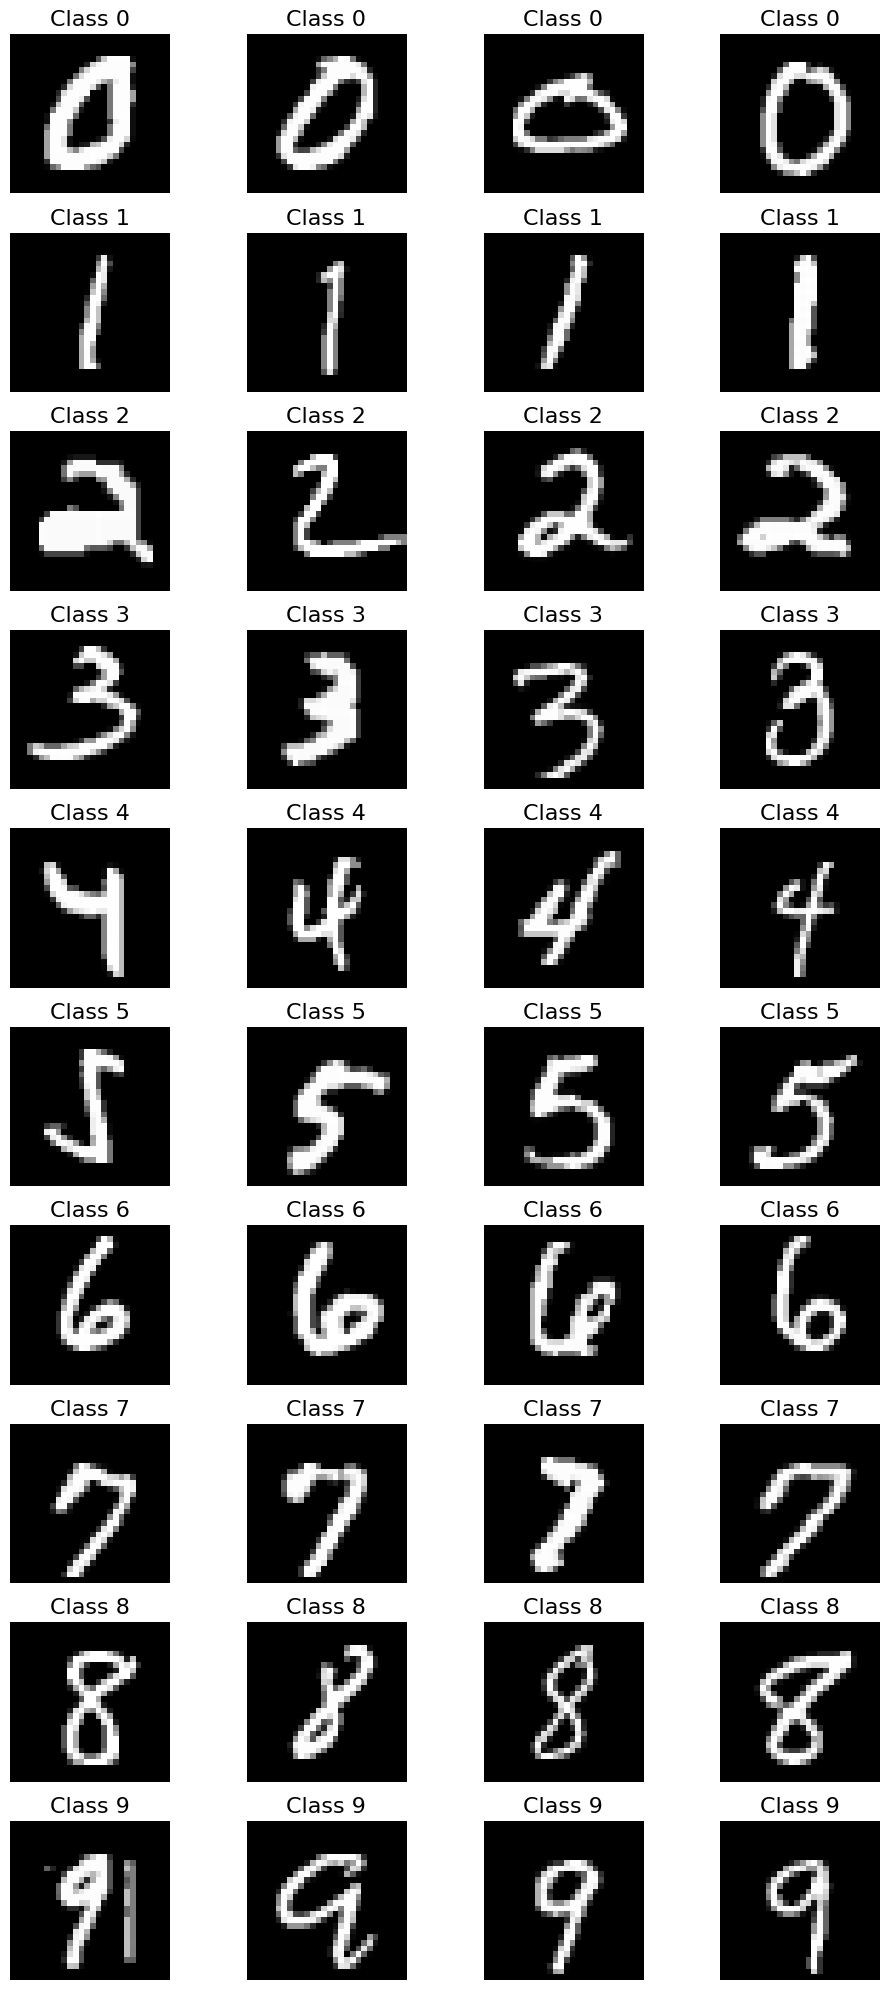

In [ ]:
# Use the function to show random images from each class
show_random_images_from_each_class(train_dataset, num_images_per_class=4)

Exercise: Variational Autoencoders (VAE) and Conditional Variational Autoencoders (CVAE)

with MLP Architectures

In this exercise, we'll explore Variational Autoencoders (VAE) and Conditional VAE (CVAE) using PyTorch.

We will implement these models using Multi-Layer Perceptrons (MLP)

Let's get started!

# 1) VAE --> MLP

In [ ]:
# Define a simple VAE class with MLP architecture

class VAE_MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE_MLP, self).__init__()
        # TODO: Define the architecture of the encoder and decoder

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, 2 * latent_dim)  # 2 times latent_dim for mu and logvar
            # TODO: Add layers for the encoder
        )
        self.fc_mu = None
        self.fc_logvar = None
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # To get values between 0 and 1 for image generation
            # TODO: Add layers for the decoder
        )

    def reparameterize(self, mu, logvar):
        # TODO: Implement the reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # TODO: Implement the forward pass
        # Encoding
        encoded = self.encoder(x)

        # Splitting into mu and logvar
        mu, logvar = torch.chunk(encoded, 2, dim=1)

        # Reparameterization
        z = self.reparameterize(mu, logvar)

        # Decoding
        decoded = self.decoder(z)
        return decoded, mu, logvar ,z

In [ ]:
data = u[0].view(-1, 28*28)
model = VAE_MLP(input_dim=784, hidden_dim=512, latent_dim=2)
recon, mu, logvar,z = model(data)

In [ ]:
print(encoded[0])
print(mu[0])#,logvar[0],
# print(data[0].shape)

tensor([-0.0084, -0.0210,  0.0105, -0.0120], grad_fn=<SelectBackward0>)
tensor([-0.0084, -0.0210], grad_fn=<SelectBackward0>)


In [ ]:
# Define VAE loss function

def vae_loss(recon, data, mu, logvar):
    # TODO: Implement the reconstruction loss
    reconstruction_loss = F.binary_cross_entropy(recon, data, reduction='sum')

    # TODO: Implement the KL divergence loss
    kl_divergence =  -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # TODO: Return the total loss as the sum of reconstruction and KL divergence losses
    total_loss = reconstruction_loss + kl_divergence
    return total_loss

In [ ]:
# Training Loop - VAE (MLP)
def train_vae_mlp(model, train_loader, num_epochs=10, learning_rate=1e-3):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_loss = float('inf')  # Initialize with a high value
    best_model = None

    for epoch in range(num_epochs):
        print()
        print(50 * "#")
        total_loss = 0
        for batch_idx, (data, _) in enumerate(train_loader):

            optimizer.zero_grad()

            # TODO: Forward process
            # print(data.shape)
            # data=data.reshape([64,784])
            data = data.view(-1, 28*28)

            recon, mu, logvar , z = model(data)


            # TODO: Flatten the data and recon tensors
            # print(data.shape)
            data = data.view(-1, 28*28)
            recon = recon.view(-1, 28*28)
            # print(data.shape)


            # TODO: Calculate the loss using the vae_loss function
            loss = vae_loss(recon, data, mu, logvar)

            # TODO: Backpropagation and optimization step
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader.dataset)
        print(f'VAE-MLP Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

        # Show some sample images after each epoch
        if (epoch + 1) % 1 == 0:
            print("Sample Images:")
            with torch.no_grad():
                num_samples = 6  # Generate num_samples random samples
                sample = torch.randn(num_samples, 2)
                sample = model.decoder(sample).view(num_samples, 1, 28, 28)
                sample = sample.squeeze().cpu()
                fig, axs = plt.subplots(1, num_samples, figsize=(15, 2))
                for i in range(num_samples):
                    axs[i].imshow(sample[i], cmap='gray')
                    axs[i].axis('off')
                plt.show()

        # TODO: Save the best model based on loss
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_model = model.state_dict()  # TODO: Save the model

    # TODO: Save the best model to a file
    torch.save(best_model, 'best_vae_mlp_model.pth')
    print("Best model saved as 'best_vae_mlp_model.pth'")



##################################################
VAE-MLP Epoch [1/10], Loss: 172.9905287109375
Sample Images:


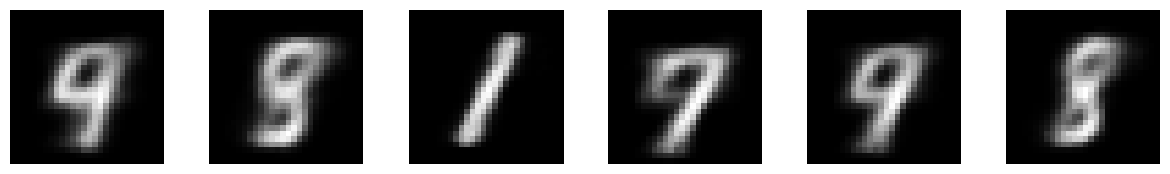


##################################################
VAE-MLP Epoch [2/10], Loss: 154.74313012695313
Sample Images:


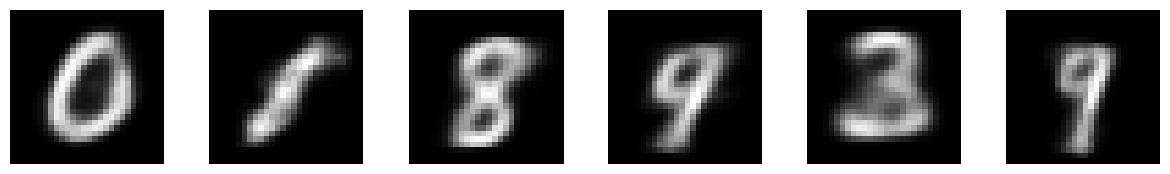


##################################################
VAE-MLP Epoch [3/10], Loss: 149.95825240885418
Sample Images:


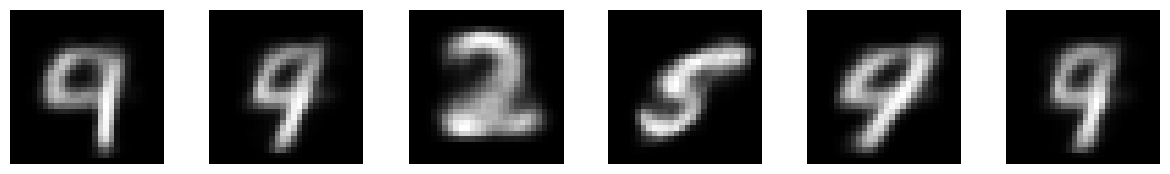


##################################################
VAE-MLP Epoch [4/10], Loss: 147.4132935139974
Sample Images:


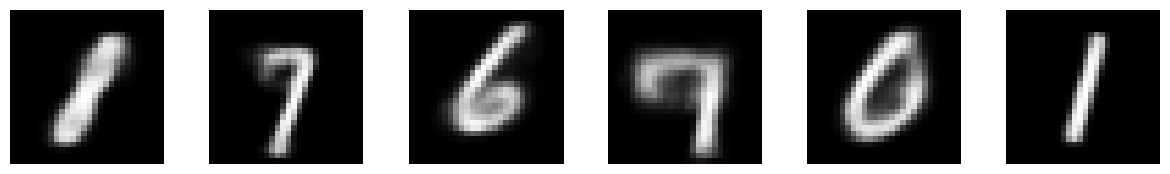


##################################################
VAE-MLP Epoch [5/10], Loss: 145.562145711263
Sample Images:


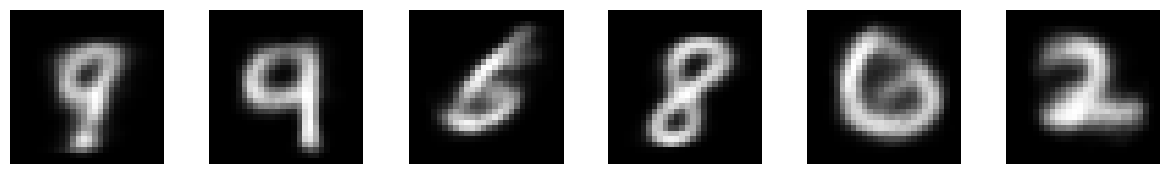


##################################################
VAE-MLP Epoch [6/10], Loss: 144.44648686523436
Sample Images:


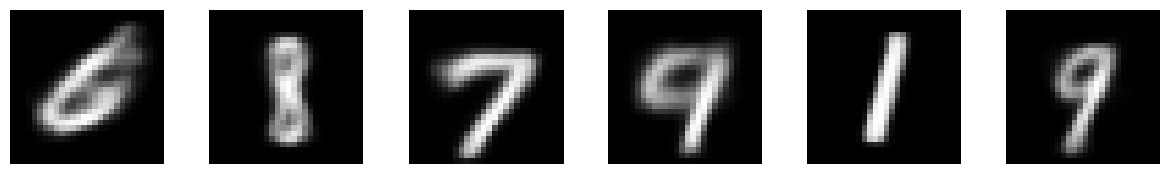


##################################################
VAE-MLP Epoch [7/10], Loss: 143.30478446451824
Sample Images:


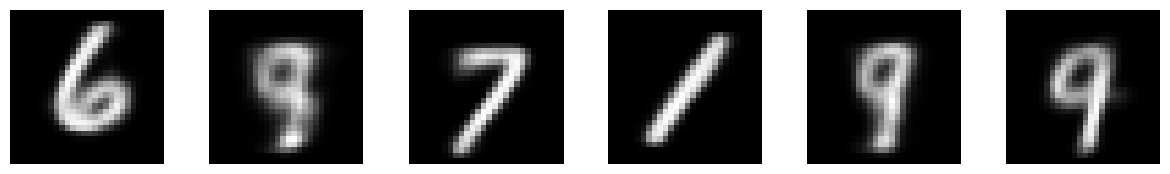


##################################################
VAE-MLP Epoch [8/10], Loss: 142.606685546875
Sample Images:


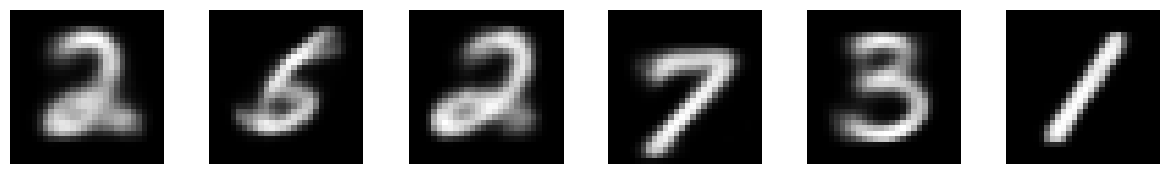


##################################################
VAE-MLP Epoch [9/10], Loss: 142.09341092122395
Sample Images:


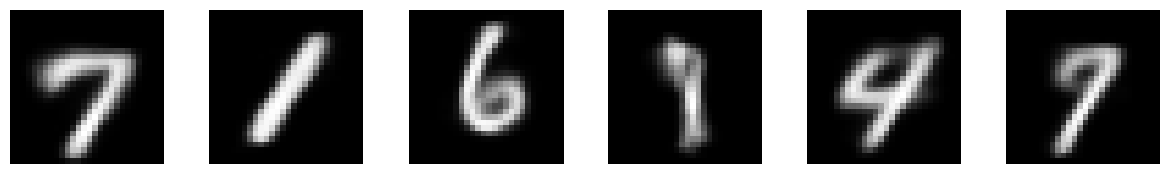


##################################################
VAE-MLP Epoch [10/10], Loss: 141.57027436523438
Sample Images:


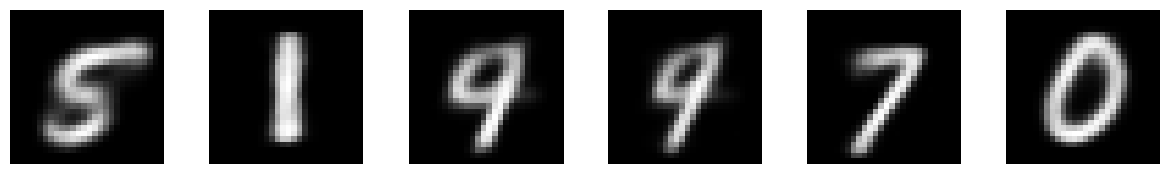

Best model saved as 'best_vae_mlp_model.pth'


In [ ]:
# Train VAE-MLP
vae_mlp = VAE_MLP(input_dim=784, hidden_dim=512, latent_dim=2)
train_vae_mlp(vae_mlp, train_loader)


# 2) CVAE --> MLP

In [ ]:
# Define a simple CVAE class with MLP architecture

class CVAE_MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_classes):
        super(CVAE_MLP, self).__init__()
        # TODO: Define the architecture of the encoder
        self.encoder = nn.Sequential(
            # TODO: Add layers for the encoder
            nn.Linear(input_dim + num_classes, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        self.fc_class = nn.Linear(hidden_dim, num_classes)

        # TODO: Define the architecture of the decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + num_classes, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
            # TODO: Add layers for the decoder
        )

    def reparameterize(self, mu, logvar):
        # TODO: Implement the reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z


    def forward(self, x, y):
        x = x.view(x.size(0), -1)
        y = y.view(y.size(0), -1)
        # print(y.shape)
        # print(x.shape)


        # TODO: Concatenate x and y before passing them to the encoder
        xy = torch.cat((x, y), dim=1)

        # TODO: Implement the forward pass
        hidden = self.encoder(xy)
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        z = self.reparameterize(mu, logvar)
        class_logits = self.fc_class(hidden)

        u=torch.cat((z, y), dim=1)

        reconstructed = self.decoder(u)

        return reconstructed, mu, logvar, class_logits , z

In [ ]:
# Define CVAE loss function
def cvae_loss(recon, data, mu, logvar, class_logits, labels):
    # TODO: Flatten the data tensor
    data = data.view(-1, 784)

    # TODO: Implement the reconstruction loss
    reconstruction_loss = F.binary_cross_entropy(recon, data, reduction='sum')

    # TODO: Implement the KL divergence loss
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # TODO: Implement the cross-entropy loss for class prediction
    ce_loss = F.cross_entropy(class_logits, labels, reduction='sum')

    # TODO: Return the total loss as the sum of reconstruction, KL divergence, and cross-entropy losses
    total_loss = reconstruction_loss + kl_divergence + ce_loss

    return total_loss


In [ ]:
# Training Loop - CVAE (MLP)
def train_cvae_mlp(model, train_loader, num_epochs=10, learning_rate=1e-3):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_loss = float('inf')  # Initialize with a high value
    best_model = None

    for epoch in range(num_epochs):
        print()
        print(50 * "#")
        total_loss = 0
        for batch_idx, (data, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            # One-hot encode the labels
            labels_one_hot = F.one_hot(labels, num_classes=10)

            # TODO: Forward pass through the model and calculate the loss using cvae_loss
            # recon = None
            # mu = None
            # logvar = None
            # class_logits = None
            # loss = None

            recon, mu, logvar, class_logits,u = model(data, labels_one_hot)
            loss = cvae_loss(recon, data, mu, logvar, class_logits, labels)


            # TODO: Backpropagation and optimization step
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader.dataset)
        print(f'CVAE-MLP Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

        # Show some sample images after each epoch
        if (epoch + 1) % 1 == 0:
            print("Sample Images:")
            with torch.no_grad():
                num_classes = 10  # Number of classes (0 to 9)
                num_samples_per_class = 1  # One sample per class
                # Generate random samples
                z = torch.randn(num_classes * num_samples_per_class, 2)
                # Generate one-hot encoded class labels
                y = torch.eye(num_classes).repeat(num_samples_per_class, 1)
                # Concatenate the random samples and class labels before passing them to the decoder
                sample = torch.cat([z, y], dim=1)
                sample = model.decoder(sample).view(num_classes * num_samples_per_class, 1, 28, 28)
                sample = sample.squeeze().cpu()
                fig, axs = plt.subplots(1, num_classes, figsize=(15, 2))
                for i in range(num_classes):
                    axs[i].imshow(sample[i], cmap='gray')
                    axs[i].set_title(f"Class {i}", fontsize=16)
                    axs[i].axis('off')
                plt.show()

        # TODO: Save the best model based on loss
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_model = model.state_dict()

    # TODO: Save the best model to a file
    torch.save(best_model, 'best_cvae_mlp_model.pth')
    print("Best model saved as 'best_cvae_mlp_model.pth'")



##################################################
CVAE-MLP Epoch [1/10], Loss: 162.52252727864584
Sample Images:


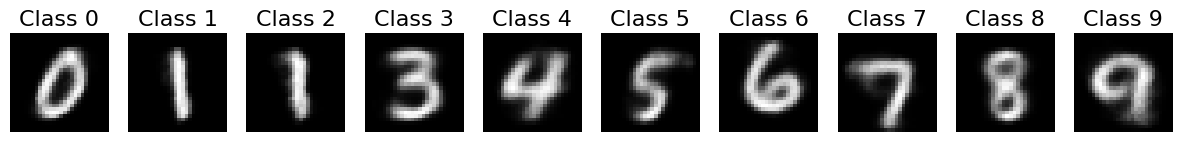


##################################################
CVAE-MLP Epoch [2/10], Loss: 138.79344606933594
Sample Images:


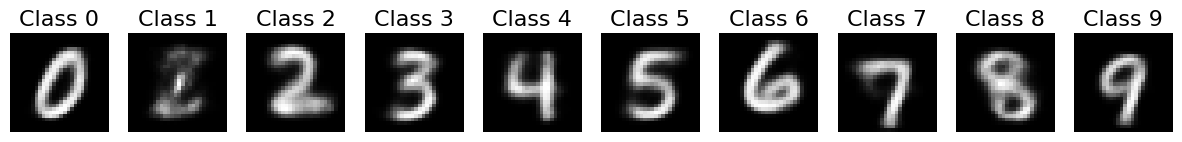


##################################################
CVAE-MLP Epoch [3/10], Loss: 135.31722907714843
Sample Images:


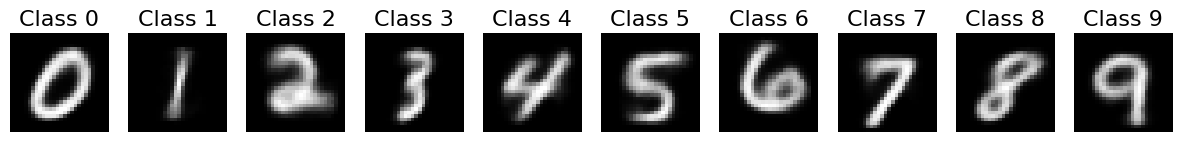


##################################################
CVAE-MLP Epoch [4/10], Loss: 133.51879969889322
Sample Images:


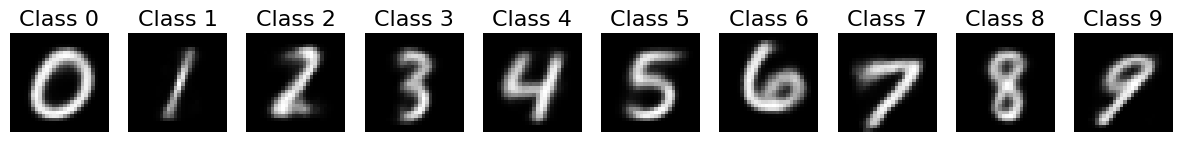


##################################################
CVAE-MLP Epoch [5/10], Loss: 132.3972621907552
Sample Images:


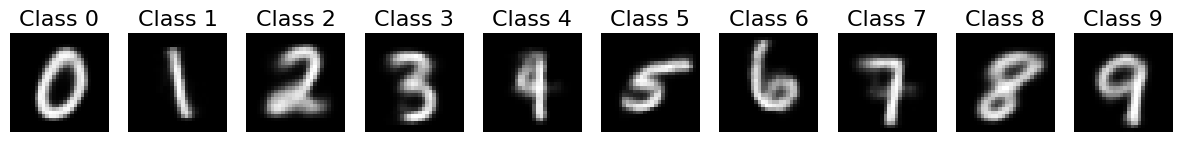


##################################################
CVAE-MLP Epoch [6/10], Loss: 131.66065471598307
Sample Images:


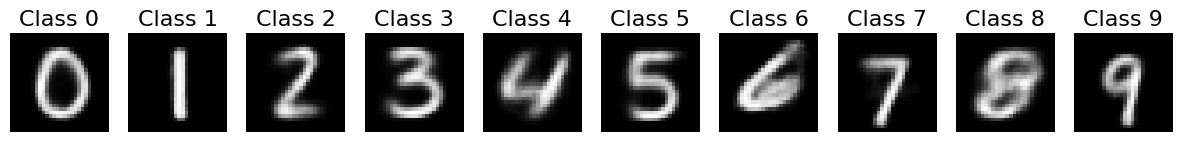


##################################################
CVAE-MLP Epoch [7/10], Loss: 131.0346954671224
Sample Images:


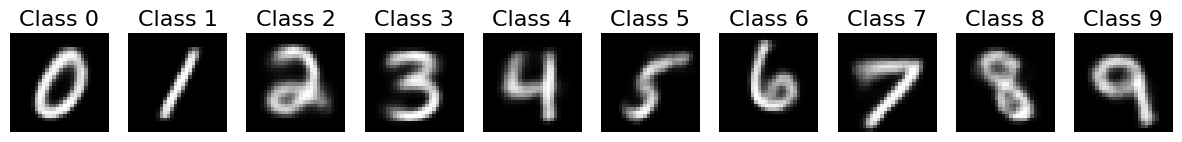


##################################################
CVAE-MLP Epoch [8/10], Loss: 130.58052845865885
Sample Images:


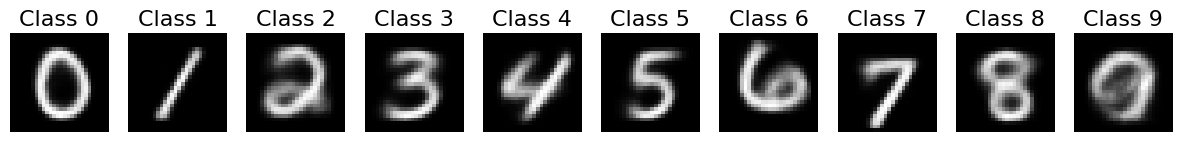


##################################################
CVAE-MLP Epoch [9/10], Loss: 130.21841616617837
Sample Images:


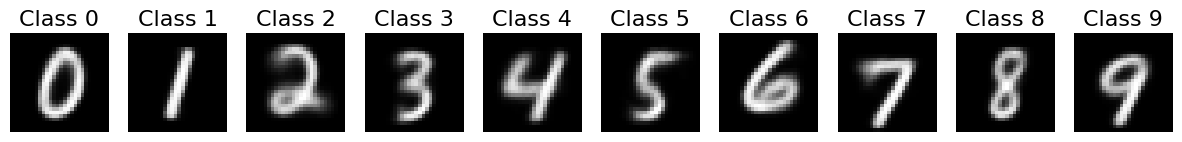


##################################################
CVAE-MLP Epoch [10/10], Loss: 129.83587196044923
Sample Images:


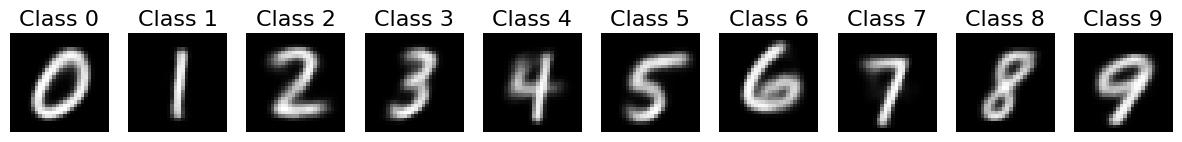

Best model saved as 'best_cvae_mlp_model.pth'


In [ ]:
cvae_mlp = CVAE_MLP(input_dim=784, hidden_dim=256, latent_dim=2, num_classes=10)
train_cvae_mlp(cvae_mlp, train_loader)

# 3) Visualizing Latent Space Distribution in Two Models

In this section, we will visualize the latent space distribution for two different models:

## Latent Space Distribution:

### VAE (MLP):

1. Visualize the latent space distribution using Multilayer Perceptron (MLP) in VAE model.
2. Analyze the characteristics of the distribution.

### CVAE (MLP):

1. Visualize the latent space distribution using Multilayer Perceptron (MLP) in CVAE model.
2. Analyze the characteristics of the distribution.


Summarize your findings and draw conclusions based on the observed differences in the latent space distribution between VAE (MLP) and CVAE (MLP).


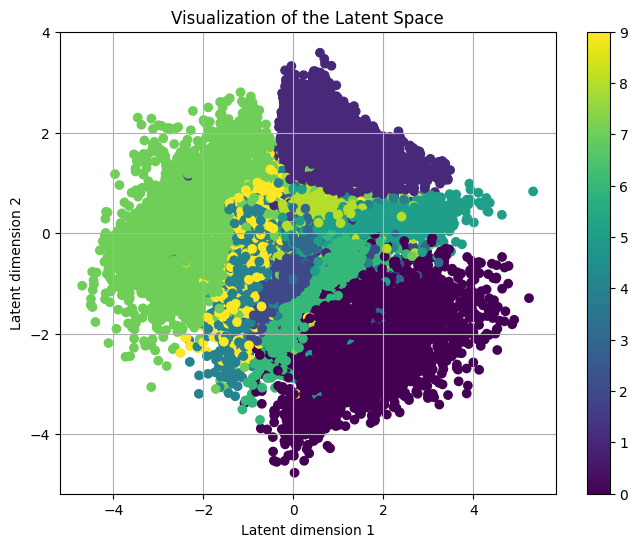

In [ ]:
# Sample code to visualize the latent space of a VAE (assuming it has been trained and 'model' is the trained model)
import matplotlib.pyplot as plt

# Iterate through the dataset and encode the data to get mu and logvar
latent_vectors = []
labels = []
model = VAE_MLP(input_dim=784, hidden_dim=512, latent_dim=2)

saved_model_state = torch.load('/content/best_vae_mlp_model.pth')
model.load_state_dict(saved_model_state)


model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for batch_idx, (data, label) in enumerate(train_loader):  # Assuming train_loader contains the dataset
        # data = dat # Move data to device (CPU/GPU)
        data = data.view(-1, 28*28)

        recon_batch, mu, logvar,z = model(data)  # Pass data through the model to get mu and logvar

        # Append mu and logvar to the list (considering you have a batch size of 64)
        latent_vectors.append(z.cpu().numpy())  # Convert to NumPy array and move to CPU
        labels.append(label.cpu().numpy())  # If labels are available

# Concatenate the lists of latent vectors and labels
latent_vectors = np.concatenate(latent_vectors, axis=0)
labels = np.concatenate(labels, axis=0)

# Plot the latent space using scatter plot (considering 2D latent space)
plt.figure(figsize=(8, 6))
plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1], c=labels, cmap='viridis')  # Assuming 2D latent space
plt.colorbar()
plt.xlabel('Latent dimension 1')
plt.ylabel('Latent dimension 2')
plt.title('Visualization of the Latent Space')
plt.grid(True)
plt.show()

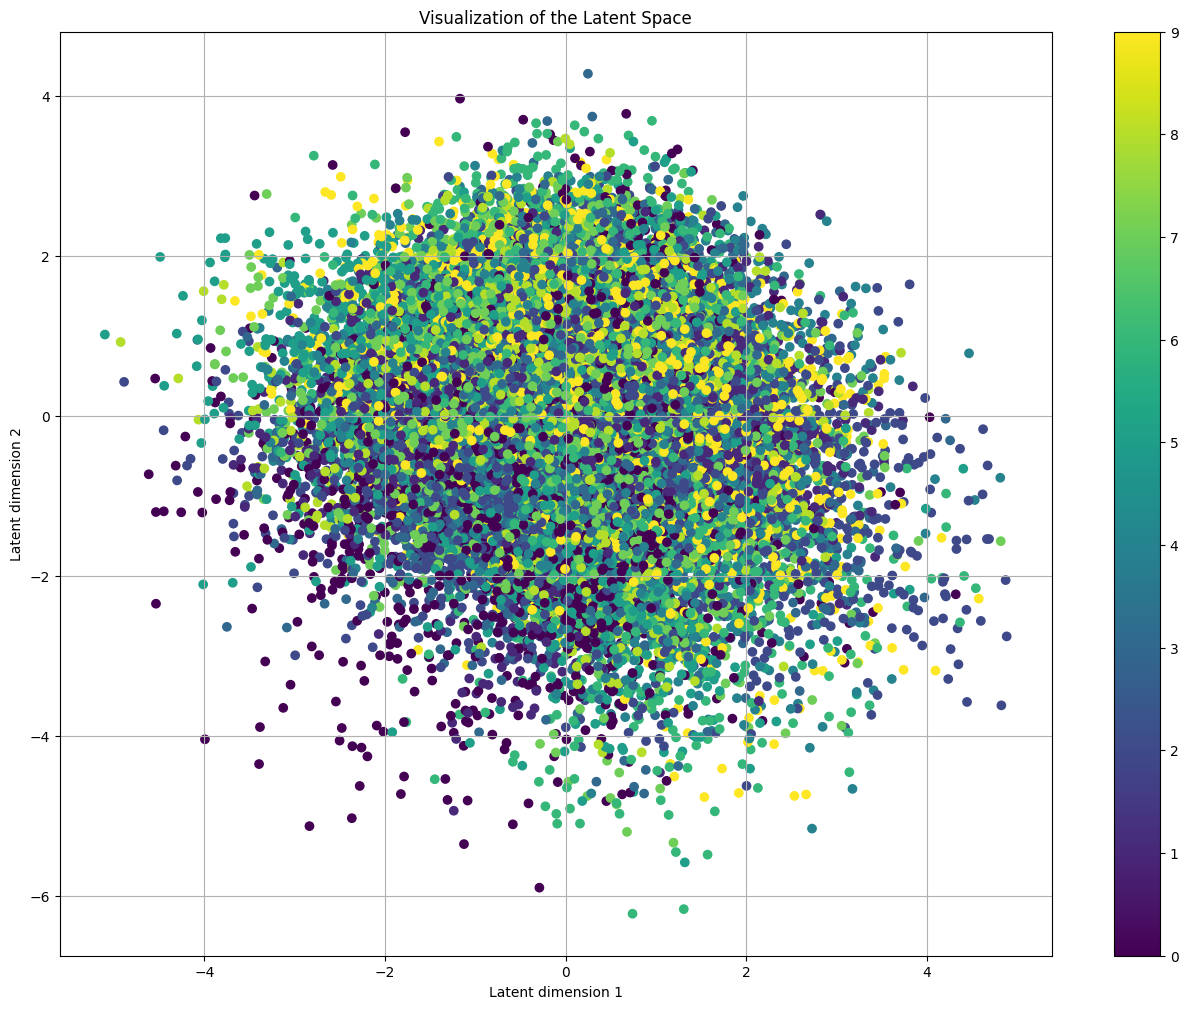

In [ ]:
# Sample code to visualize the latent space of a VAE (assuming it has been trained and 'model' is the trained model)
import matplotlib.pyplot as plt

# Iterate through the dataset and encode the data to get mu and logvar
latent_vectors = []
labels = []
cvae_mlp = CVAE_MLP(input_dim=784, hidden_dim=256, latent_dim=2, num_classes=10)

saved_model_state = torch.load('/content/best_cvae_mlp_model.pth')
cvae_mlp.load_state_dict(saved_model_state)


cvae_mlp.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for batch_idx, (data, label) in enumerate(train_loader):  # Assuming train_loader contains the dataset
        # data = dat # Move data to device (CPU/GPU)
        data = data.view(-1, 28*28)
        labels_one_hot = F.one_hot(label, num_classes=10)

        recon_batch, mu, logvary,y,z = cvae_mlp(data,labels_one_hot)  # Pass data through the model to get mu and logvar

        # Append mu and logvar to the list (considering you have a batch size of 64)
        latent_vectors.append(z.cpu().numpy())  # Convert to NumPy array and move to CPU
        labels.append(label.cpu().numpy())  # If labels are available

# Concatenate the lists of latent vectors and labels
latent_vectors = np.concatenate(latent_vectors, axis=0)
labels = np.concatenate(labels, axis=0)

# Plot the latent space using scatter plot (considering 2D latent space)
plt.figure(figsize=(16, 12))
plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1], c=labels, cmap='viridis')  # Assuming 2D latent space
plt.colorbar()
plt.xlabel('Latent dimension 1')
plt.ylabel('Latent dimension 2')
plt.title('Visualization of the Latent Space')
plt.grid(True)
plt.show()
